# Titanic Survival Rate Analysis

Jim Haskin

GA-Data Science
Dec 2015
1/7/2016

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline


### Check for file name

In [2]:
!ls

README.md                  titanic_haskin_edit.ipynb
Titanic.ipynb              titanic_haskin_final.ipynb
titanic.csv


### Check top and bottom of file titanic.csv

In [3]:
!head -n 10 titanic.csv

891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,,Q

In [4]:
!tail -n 10 titanic.csv

891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,,Q

#### Appears to be one long line
- try importing

In [5]:
data = pd.read_csv('titanic.csv')
data.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


#### First column is passenger ID. Should use as index

In [6]:
data = pd.read_csv('titanic.csv', index_col=0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


### change labels to all lower case

In [7]:
data.columns = [x.lower() for x in data.columns]

## investigate data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data['pclass'].unique()

array([3, 1, 2])

In [11]:
data['sex'].unique()

array(['male', 'female'], dtype=object)

In [12]:
data['sibsp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [13]:
data['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
data['parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

## What do you notice about the data? Any issues?

## Observations
891 entries
11 fields
- survived - Boolean               Complete entries
- pclass   - int range 1,2,3       Complete entries
- name     - string in the form last, title. first middle (maidenFirst maidenLast) Complete entries
- sex      - string ['male', 'female'] Complete entries
- age      - float  range .42 - 80           Missing 177 entries ~ 20%
- sibsp    - int range 0 - 8       Complete entries - unsure meaning  -  # of siblings or spouse
- parch    - int range 0 - 6       Complete entries - unsure meaning   - # parents or children
- ticket   - string number with some prefixed with chars Complete entries - 
- fare     - float range 0.0 - 512.3292  Complete entries     * unknown unit (british pounds)
- cabin    - string                 Only 204 entries      * appears only class 1 passengers have cabins
- embarked - char values ['S', 'C', 'Q', nan] Missing 2 values



## Plotting Variables

In [15]:
print plt.style.available

[u'dark_background', u'bmh', u'grayscale', u'ggplot', u'fivethirtyeight']


In [16]:
# use ggplot style for all graphics
#plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
#plt.style.use('dark_background')
#plt.style.use('bmh')
#plt.style.use('grayscale')

In [17]:
gender_colors = ['salmon','cornflowerblue']
class_colors = ['seagreen','y','royalblue']
age_colors = ['y','orange','salmon','violet','cornflowerblue','seagreen','peru','plum']
f_size = 15

## What is the overall survival rate?

In [18]:
sr = data[['survived']].mean()
survival_rate = round(sr['survived'] * 100, 2)
print 'Survival Rate ',survival_rate,'%'

Survival Rate  38.38 %


## How many people survived 

In [84]:
survive_count = data['survived'].value_counts()
print survive_count[0],'- Did not Survive'
print survive_count[1],'- Did Survive'

549 - Did not Survive
342 - Did Survive


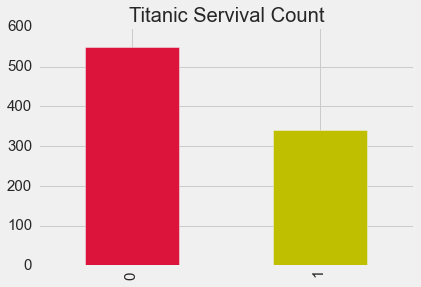

In [21]:
survive_count.plot(kind='bar', color=['crimson','y'], fontsize=f_size,
                   title='Titanic Servival Count');


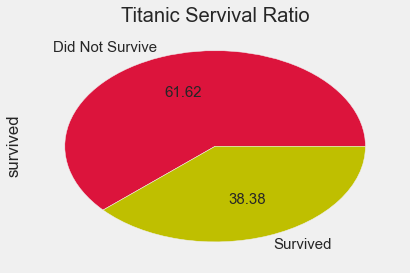

In [20]:
survive_count.plot(kind='pie',
                   labels=['Did Not Survive','Survived'],
                   colors=['crimson','y'],
                   fontsize=f_size,
                   #figsize=(6, 6),
                   autopct='%.2f',
                   title='Titanic Servival Ratio');

## What role does gender play in surviving?

### Gender Breakdown

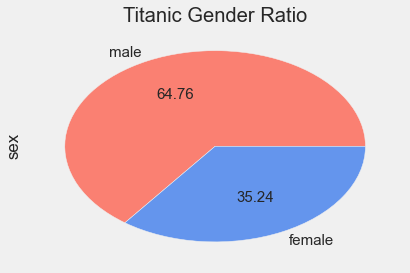

In [83]:
gender_count = data['sex'].sort_values(ascending=True).value_counts()
gender_count.plot.pie(colors=gender_colors,
                      fontsize=f_size,
                      #sort_columns=True,
                      #figsize=(6, 3),
                      autopct='%.2f',
                      title='Titanic Gender Ratio');

In [23]:
survived_by_gender_group = data.groupby(['sex'])[['survived']].mean()
#survived_by_gender_group

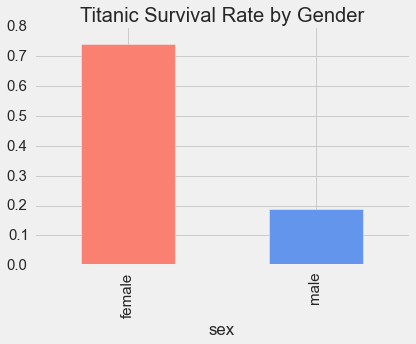

In [24]:
survived_by_gender_group['survived'].plot.bar(color=gender_colors, fontsize=f_size,
                                             title='Titanic Survival Rate by Gender');    # need to pass Series

### Observation 
The survival rate of the women was much higher than the men

## What role does class play in surviving?

### Count up Passengers by Class

In [25]:
class_count = data['pclass'].value_counts().sort_index()
class_count

1    216
2    184
3    491
Name: pclass, dtype: int64

### Display Number of Passengers in each class

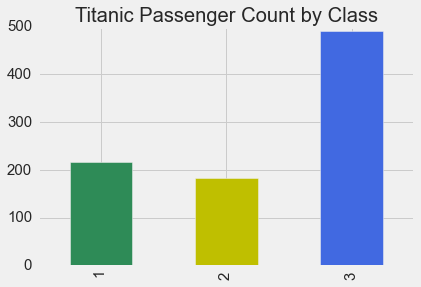

In [26]:
class_count.plot.bar(sort_columns=True,
                     color=class_colors,
                     fontsize=f_size,
                     title='Titanic Passenger Count by Class');

### Display Percentage of Passengers in each class

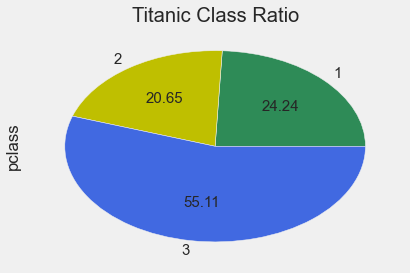

In [27]:
class_count.plot.pie(sort_columns=True,
                     colors=class_colors,
                     fontsize=f_size,                        
                     autopct='%.2f',
                     title='Titanic Class Ratio');

In [28]:
survived_by_class_group = data.groupby(['pclass'])[['survived']].mean()
# survived_by_class_group

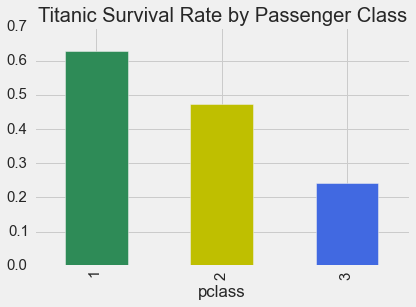

In [29]:
survived_by_class_group['survived'].plot.bar(color=class_colors,
                                             fontsize=f_size,
                                             title='Titanic Survival Rate by Passenger Class'); 

### Observation 
The Higher class passengers had a higher survival rate

### Further breakdown by class/gender

In [30]:
class_sub_gender_count = data.groupby(['pclass', 'sex'])[['name']].count()
class_sub_gender_count

name
pclass sex         
1      female    94
       male     122
2      female    76
       male     108
3      female   144
       male     347

In [31]:
survived_by_class_sub_gender_group = data.groupby(['pclass', 'sex'])[['survived']].mean()
#survived_by_class_sub_gender_group

/Users/jsmithson/anaconda/lib/python2.7/site-packages/pandas/core/index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


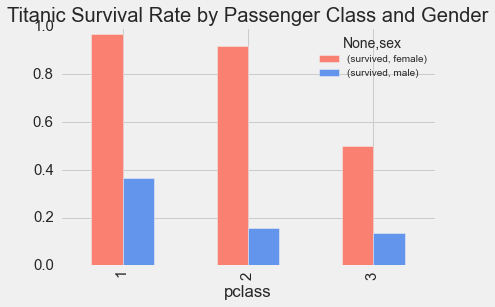

In [32]:
survived_by_class_sub_gender_group.unstack(level=-1).plot.bar(fontsize=f_size, 
                              color=gender_colors,
                              title='Titanic Survival Rate by Passenger Class and Gender');    

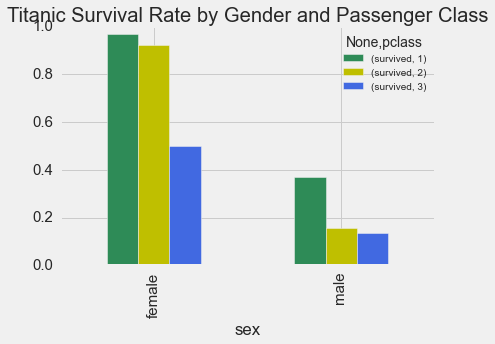

In [33]:
survived_by_class_sub_gender_group.unstack(level=0).plot.bar(fontsize=f_size, 
                             color=class_colors,
                             title='Titanic Survival Rate by Gender and Passenger Class');

### Observation 
The strong difference of gender was stronger than that for class. 3rd class females still had a higher survival rate than 1st class men.

## What role does age play in surviving?

#### remove data that has 0 or no info for age

In [34]:
data.sort_values('age').tail(5)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [35]:
age_data = data.dropna(subset=['age'])
age_data.describe()

,survived,pclass,age,sibsp,parch,fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


### Investigate the new data frame

In [36]:
age_data['age'].max()

80.0

In [37]:
age_data.sort_values('age', ascending=False).head(5)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


### Look at the Number of passengers by age and then gender and class

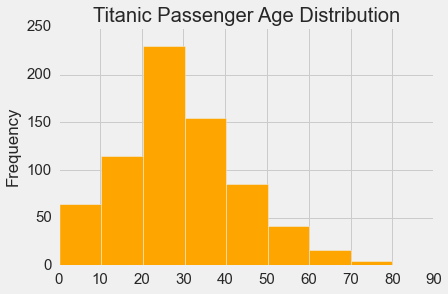

In [38]:
age_data['age'].plot(kind='hist', bins=8, color='orange',fontsize=f_size, title='Titanic Passenger Age Distribution');

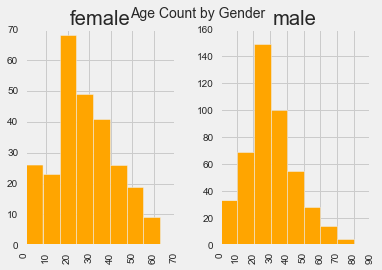

In [39]:
#plt.title=('Age by Gender Count')
age_data['age'].hist(bins=8, by=data['sex'], color='orange'); 
plt.suptitle("Age Count by Gender");

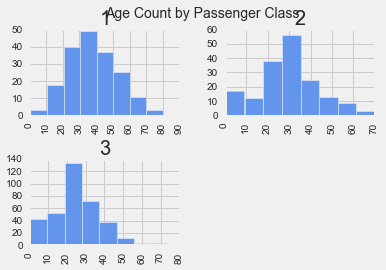

In [40]:
age_data['age'].hist(bins=8, by=data['pclass'], color='cornflowerblue')
plt.suptitle("Age Count by Passenger Class");

### Observation 
Age distribution was consistant across gender and class

### Group Data by 10 year age groups

In [41]:
age_grouped = age_data.groupby(pd.cut(age_data['age'], np.arange(0, 90, 10), right=False))
#age_grouped

In [42]:
age_group_count = age_grouped.sum()
age_group_count

,survived,pclass,age,sibsp,parch,fare
age,,,,,,
"[0, 10)",38,163,253.17,115,87,1895.7541
"[10, 20)",41,252,1711.50,68,48,3318.5835
"[20, 30)",77,539,5397.50,71,55,6001.3662
"[30, 40)",73,353,5663.00,59,55,6743.0081
"[40, 50)",34,175,3922.00,33,42,3382.2044
"[50, 60)",20,75,2565.50,14,13,2300.8000
"[60, 70)",6,28,1186.00,5,7,918.9833
"[70, 80)",0,11,426.50,1,1,181.1834


In [43]:
#survived_by_age_group = age_grouped[['survived']].mean()
#survived_by_age_group

In [44]:
survived_by_age_group = age_grouped.mean()
survived_by_age_group

,survived,pclass,age,sibsp,parch,fare
age,,,,,,
"[0, 10)",0.612903,2.629032,4.083387,1.854839,1.403226,30.576679
"[10, 20)",0.401961,2.470588,16.779412,0.666667,0.470588,32.535132
"[20, 30)",0.350000,2.450000,24.534091,0.322727,0.250000,27.278937
"[30, 40)",0.437126,2.113772,33.910180,0.353293,0.329341,40.377294
"[40, 50)",0.382022,1.966292,44.067416,0.370787,0.471910,38.002297
"[50, 60)",0.416667,1.562500,53.447917,0.291667,0.270833,47.933333
"[60, 70)",0.315789,1.473684,62.421053,0.263158,0.368421,48.367542
"[70, 80)",0.000000,1.833333,71.083333,0.166667,0.166667,30.197233


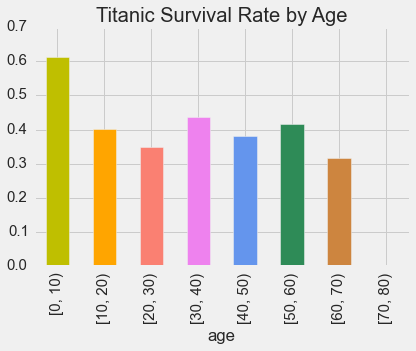

In [71]:
survived_by_age_group['survived'].plot.bar(color=age_colors,
                                           fontsize=f_size,
                                           title='Titanic Survival Rate by Age Group'); 

### Observation 
0-10 year old have a much higher survival rate

### further divide by age and gender

In [46]:
age_gender_grouped = data.groupby([pd.cut(data['age'], np.arange(0, 90, 10), right=False), 'sex'])
#age_gender_grouped

In [47]:
survived_by_age_sub_gender = age_gender_grouped[['survived']].mean()
survived_by_age_sub_gender.head(5)

survived
age      sex             
[0, 10)  female  0.633333
         male    0.593750
[10, 20) female  0.755556
         male    0.122807
[20, 30) female  0.722222

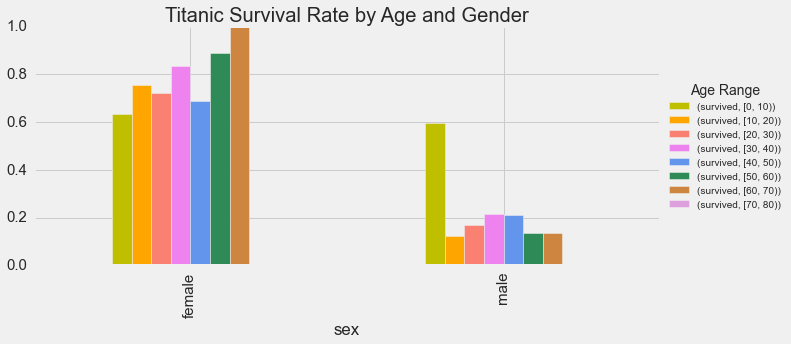

In [48]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,1,1)

survived_by_age_sub_gender.unstack(level=0).plot.bar(ax=ax, fontsize=f_size, 
                             color=age_colors,
                             title=('Titanic Survival Rate by Age and Gender')) 
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Age Range');

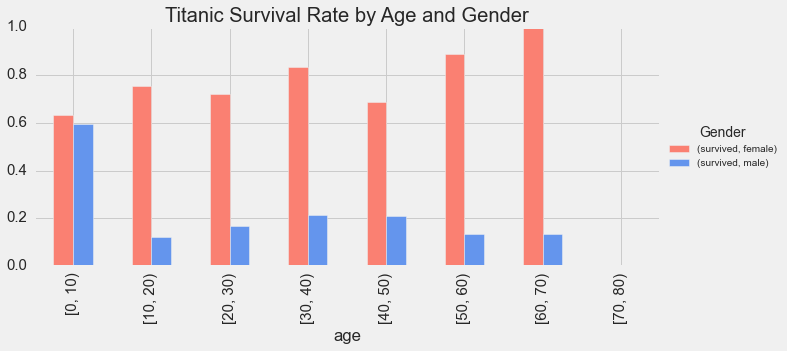

In [49]:
survived_by_age_sub_gender.unstack(level=-1).plot.bar(fontsize=f_size, 
                             figsize=(10,4),
                             color=gender_colors,
                             title=('Titanic Survival Rate by Age and Gender')) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Gender');

### Observation 
0-10 year old males had much higher SR than other males. It was as high as the young females.

### further divide by age/class

In [50]:
age_class_grouped = data.groupby([pd.cut(data['age'], np.arange(0, 90, 10), right=False), 'pclass'])
#age_class_grouped

In [51]:
survived_by_age_sub_class = age_class_grouped[['survived']].mean()
survived_by_age_sub_class.head(5)

survived
age      pclass          
[0, 10)  1       0.666667
         2       1.000000
         3       0.452381
[10, 20) 1       0.833333
         2       0.500000

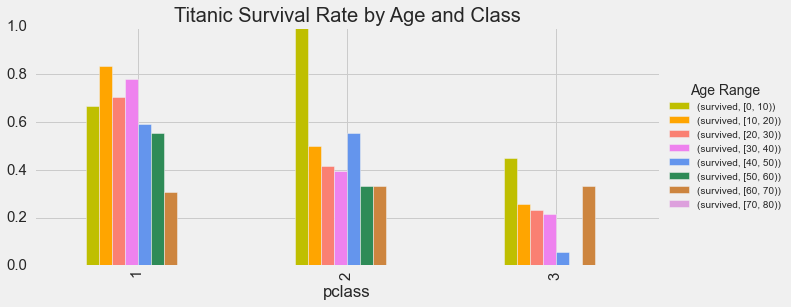

In [52]:
survived_by_age_sub_class.unstack(level=0).plot.bar(fontsize=f_size, 
                             figsize=(10, 4),
                             color=age_colors,
                             title=('Titanic Survival Rate by Age and Class')) ;
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Age Range');

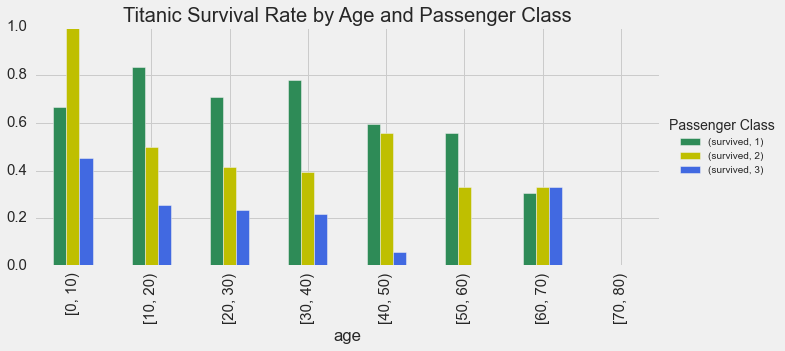

In [53]:
survived_by_age_sub_class.unstack(level=-1).plot.bar(fontsize=f_size, 
                             figsize=(10, 4),
                             color=class_colors,
                             title=('Titanic Survival Rate by Age and Passenger Class')) ;
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Passenger Class');

### Observation 
The general class trends continued over the age brackets. Exception was the 1st class kids.

## ALL Three age, gender and class

In [54]:
gender_age_class_grouped = age_data.groupby(['sex', pd.cut(age_data['age'], np.arange(0, 90, 10), right=False), 'pclass'])


In [55]:
survived_by_gender_age_class = gender_age_class_grouped[['survived']].mean()
survived_by_gender_age_class.head()

survived
sex    age      pclass          
female [0, 10)  1        0.00000
                2        1.00000
                3        0.52381
       [10, 20) 1        1.00000
                2        1.00000

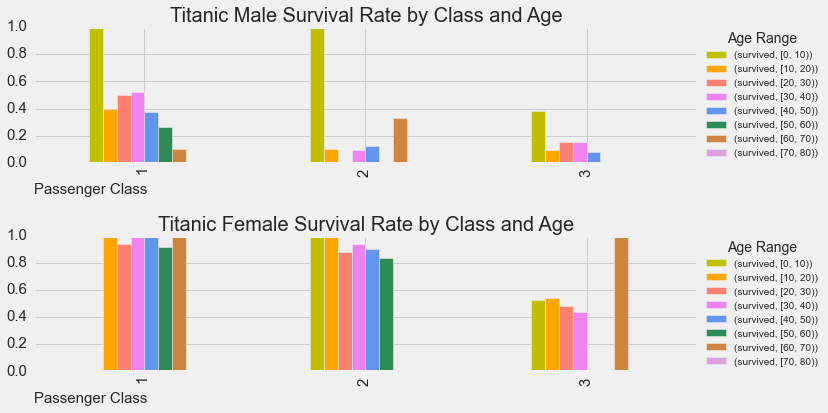

In [56]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,1,1)
ax1.set_title('Titanic Male Survival Rate by Class and Age', fontsize=f_size+5)
ax2 = fig.add_subplot(2,1,2)
ax2.set_title('Titanic Female Survival Rate by Class and Age', fontsize=f_size+5)
survived_by_gender_age_class.loc['male'].unstack(level=0).plot.bar(ax=ax1,fontsize=f_size, 
                             color=age_colors) 
survived_by_gender_age_class.loc['female'].unstack(level=0).plot.bar(ax=ax2, fontsize=f_size, 
                             color=age_colors) 
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Age Range')
ax1.set_xlabel('Passenger Class', ha='left', fontsize=f_size)
ax1.xaxis.set_label_coords(0, -0.15)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Age Range')
ax2.set_xlabel('Passenger Class', ha='left', fontsize=f_size)
ax2.xaxis.set_label_coords(0, -0.15)
plt.tight_layout()

## Given the above, do you have any guesses on what predicts survival?

### Conclusions
- The phrase "Women and Children first" holds true. Plus it helps to have some money.

## Do you have any ideas for new features we could create from the data that would help us predict if someone will survive?

## To Investigate
- Marital/Family Status
- --Can use the name field and the SIBSP and PARCH fields to investigate if couples or parents with children had higher survival rates
- -- Create 'Married', 'Parent', Traveling with Family'
- Where the passenger embarked from
- Use Fare to further divide Class. See if Super Rich had Higher survival rate
- Cabin Location 
- --Could see if location makes a difference
- --Probably not useful. Only works for 1st class. Do not know if passengers were in cabins when ship was struck.


### look at embarked data

In [59]:
emb_data = data.dropna(subset=['embarked'])
emb_data.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [60]:
embark_count = data['embarked'].value_counts().sort_index()
embark_count

C    168
Q     77
S    644
Name: embarked, dtype: int64

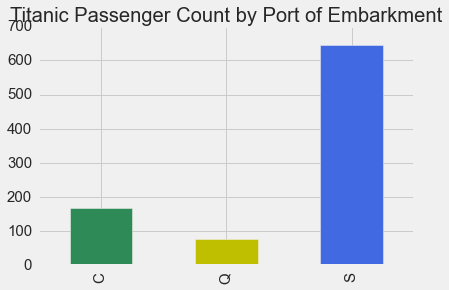

In [90]:
embark_count.plot.bar(sort_columns=True,
                     color=['seagreen','y','royalblue'],
                     fontsize=15,
                     title='Titanic Passenger Count by Port of Embarkment');

In [62]:
survived_by_embark_group = data.groupby(['embarked'])[['survived']].mean()
survived_by_embark_group

,survived
embarked,
C,0.553571
Q,0.389610
S,0.336957


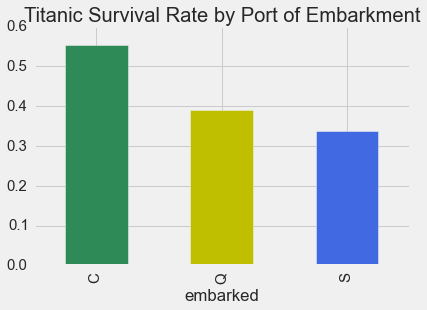

In [85]:
survived_by_embark_group['survived'].plot.bar(colors=['seagreen','y','royalblue'],
                                             fontsize=15,
                                             title='Titanic Survival Rate by Port of Embarkment') ;

### looking at fares

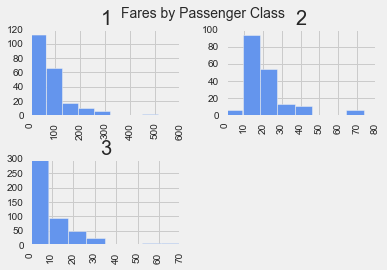

In [88]:
data['fare'].hist(bins=8, by=data['pclass'], color='cornflowerblue')
plt.suptitle("Fares by Passenger Class");

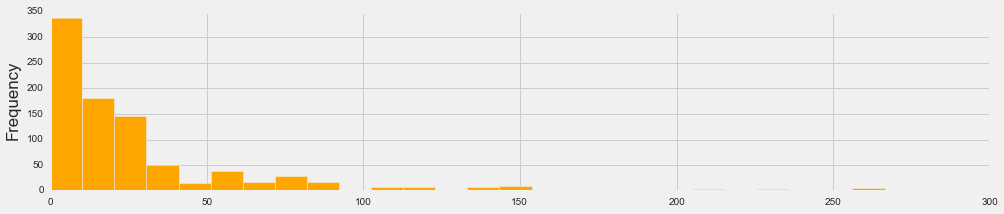

In [92]:
data['fare'].plot(kind='hist', bins=50, xlim=(0, 300), color='orange',figsize=(15, 3));


## Possible new fields
-
- Parse the name into title, first, last, maiden and husband's name

In [69]:
def parse_name(name):
    first, last, title, maiden, husband = '','','','',''
     
    comma = name.find(',')
    last = name[0:comma]
    period = name.find('.')
    title = name[comma+2:period+1]
    bracket = name.find("(")
    if bracket == -1 :          # No Maiden name
        first = name[period+2:]
    else:                      # there is a maiden name 
        bracket = name.find("(")
        maiden_name = name[bracket+1:-1]
        split = maiden_name.rfind(' ')
        maiden = maiden_name[split+1:]
        first = maiden_name[0:split]
        husband = name[period+2:bracket-1]
    return (title, first, last, maiden, husband)
    

In [70]:
data['p_title'], data['p_fname'], data['p_lname'], data['p_maiden'], data['p_husband_name'] = zip(*data['name'].apply(parse_name))
data.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,p_title,p_fname,p_lname,p_maiden,p_husband_name
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Mr.,Owen Harris,Braund,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs.,Florence Briggs,Cumings,Thayer,John Bradley
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,Laina,Heikkinen,,
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs.,Lily May,Futrelle,Peel,Jacques Heath
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Mr.,William Henry,Allen,,
